In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [6]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6613-4050

 C:\Users\wolever\dataitgirls\open-data-park\data 디렉터리

2018-08-10  오전 11:50    <DIR>          .
2018-08-10  오전 11:50    <DIR>          ..
2018-08-10  오전 11:48         2,422,465 전국도시공원표준데이터.csv
               1개 파일           2,422,465 바이트
               2개 디렉터리   8,275,644,416 바이트 남음


In [28]:
df = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr', engine='python')
df.shape

(13135, 18)

In [29]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

In [30]:
# 도로명 주소에 비어잇는 값들은 지번주소로 채워주기.
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace = True)

In [31]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

In [35]:
df.columns
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,구군,공원면적그래프용
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597.0,033-480-2927,2018-02-28,강원도,양구군,0.1597
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498.0,033-480-2927,2018-02-28,강원도,양구군,0.1498
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499.0,033-480-2927,2018-02-28,강원도,양구군,0.1499
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437.0,033-480-2460,2018-02-28,강원도,양구군,1.8437
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931.0,033-480-2576,2018-02-28,강원도,양구군,17.8931


In [32]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

C:\Users\wolever\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


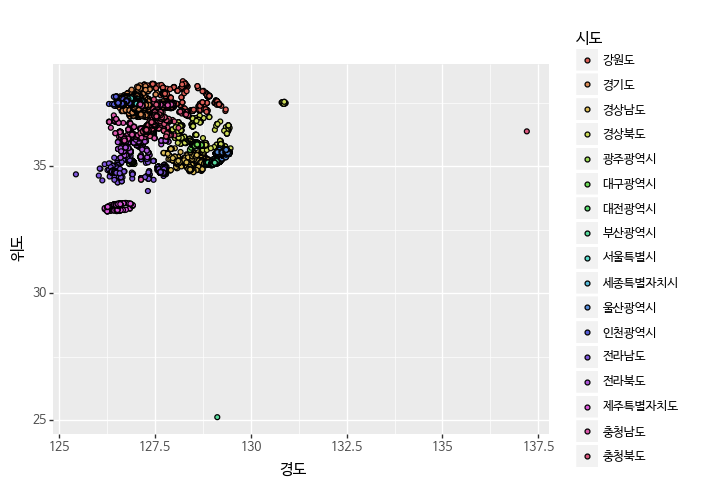

<ggplot: (18207054)>

In [36]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도', fill='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [37]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
df = df.loc[(df['위도'] > 32 ) & (df['경도'] < 132) & df['시도'].notnull()]
df.shape

(13127, 13)

In [42]:
# 특정지역의 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
df_sample = df.loc[df['공원구분'].str.match(park_type)]


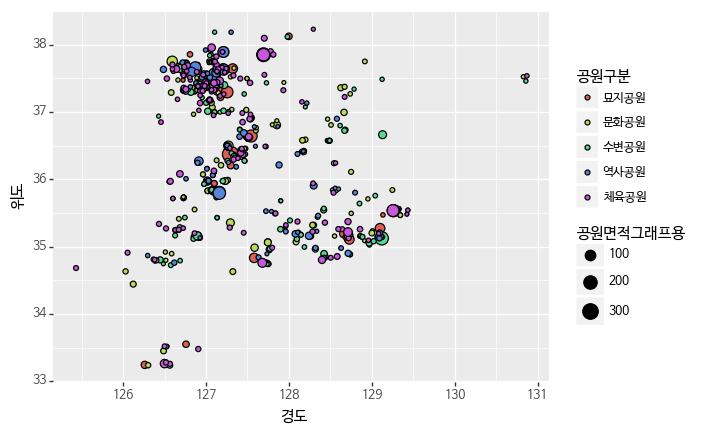

<ggplot: (-9223372036841688860)>

In [43]:
# 특정 지역의 일부 공원 구분 기준으로 뽑아보기
(ggplot(df_sample)
 + aes(x='경도', y='위도', fill='공원구분', size='공원면적그래프용')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

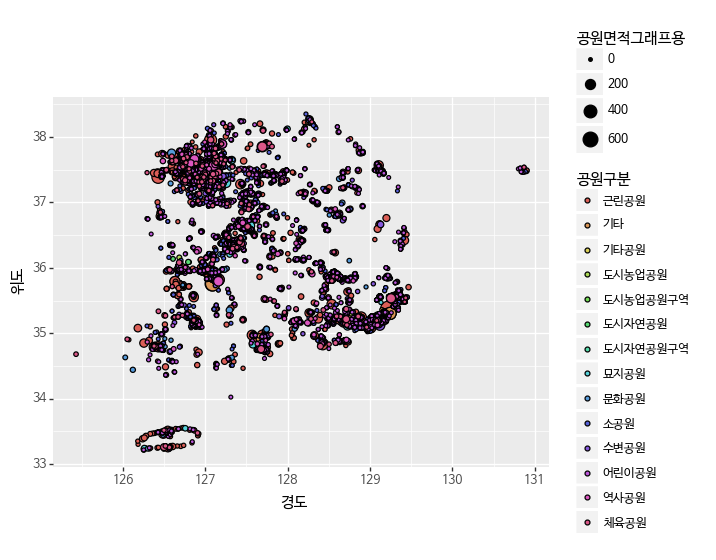

<ggplot: (-9223372036837097619)>

In [39]:
# 공원 구분 기준으로 뽑아보기
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원구분', size='공원면적그래프용')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

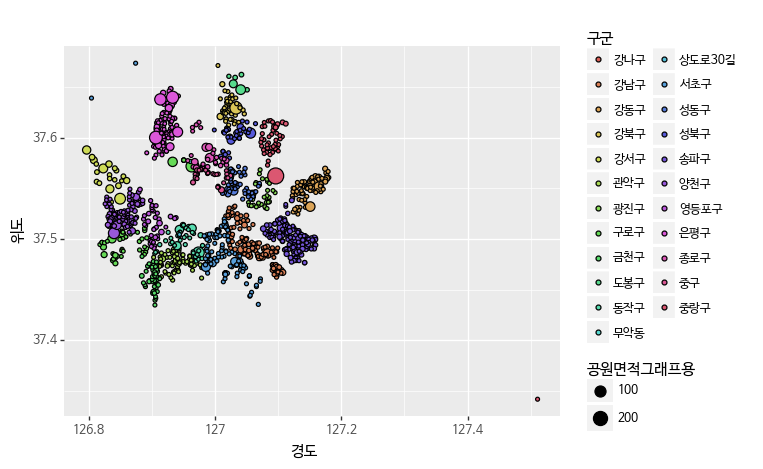

<ggplot: (-9223372036837095985)>

In [40]:
# 공원구분, 서울만 보고 싶다.
seoul = df.loc[df['시도'].str.startswith('서울')]
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='구군', size='공원면적그래프용')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [69]:
df_sido = df.groupby(['시도']).mean()
df_sido.head()

,위도,경도,공원면적,공원면적그래프용
시도,,,,
강원도,37.677444,128.264825,31195.465327,3.119547
경기도,37.425336,126.981813,28307.088392,2.830709
경상남도,35.190850,128.526675,47162.568672,4.716257
경상북도,36.282681,128.693806,34366.797849,3.436680
광주광역시,35.157368,126.895359,18650.706909,1.865071


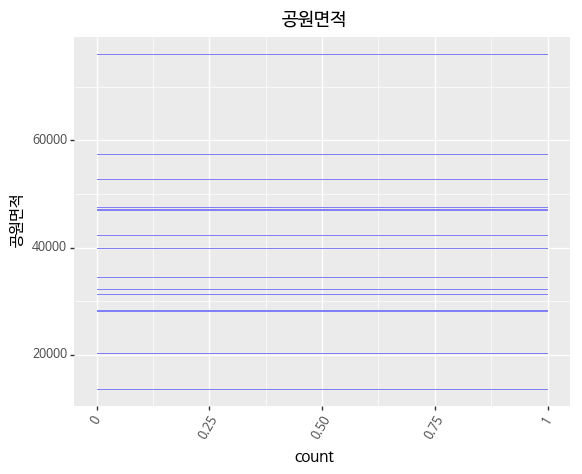

<ggplot: (-9223372036841898997)>

In [70]:
(ggplot(df_sido)
 + aes('공원면적')
 + geom_bar(fill='#8181F7')
 + ggtitle('공원면적')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)